# **Import Library**

In [ ]:
# Install library yang diperlukan
import numpy as np
import pandas as pd
import math
#from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()
from sklearn.metrics.pairwise import linear_kernel
from sklearn.metrics.pairwise import cosine_similarity
from google.colab import drive
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_absolute_error, mean_squared_error

Instructions for updating:
non-resource variables are not supported in the long term


# **Persiapan Data**

In [ ]:
# Mount (hubungkan) Google Drive
drive.mount('/content/drive')

# Path dari file yang ingin Anda baca
file_path = '/content/drive/MyDrive/Tes TA/Copy of FILM.csv'
file_ratings = '/content/drive/MyDrive/Tes TA/Copy of AKUN RATING.csv'

# Membaca file CSV ke dalam DataFrame
df_film = pd.read_csv(file_path)
df_film = df_film.rename(columns={'name': 'Film'})
df_film.head()

Mounted at /content/drive


,Unnamed: 0,type,Film,url,poster,description,review,IMDB,contentRating,genre,datePublished,keywords,duration,actor,director,creator,RottenTomatoes Audience Score,RottenTomatoes Tomato Meter
0,265,Movie,14 Cameras,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMTk4OD...,When a family of five rent a beautiful house f...,"{'author': 'aprilsfriendorin', 'dateCreated': ...",2.3,TV-MA,"['Crime', 'Horror', 'Thriller']",2018-07-27,"tied feet,tied up while barefoot,tape over mou...",PT1H30M,"[{'name': 'Zach Dulin', 'url': 'https://www.im...","[{'name': 'Seth Fuller', 'url': 'https://www.i...","[{'name': 'Victor Zarcoff', 'url': 'https://ww...",1.10,1.1
1,266,Movie,17 Again,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BMjA2NT...,0,"{'author': 'tavm', 'dateCreated': '2009-04-21'...",3.2,PG-13,"['Comedy', 'Drama', 'Fantasy']",2009-04-17,"body transformation,adult as child,high school...",PT1H42M,"[{'name': 'Zac Efron', 'url': 'https://www.imd...","[{'name': 'Burr Steers', 'url': 'https://www.i...","[{'name': 'Jason Filardi', 'url': 'https://www...",3.35,2.8
2,267,Movie,1BR,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNDgxY2...,0,"{'author': 'aarpcats', 'dateCreated': '2022-01...",2.9,TV-MA,"['Drama', 'Horror', 'Thriller']",2020-04-24,"community,apartment building,submission,stockh...",PT1H30M,"[{'name': 'Nicole Brydon Bloom', 'url': 'https...","[{'name': 'David Marmor', 'url': 'https://www....","[{'name': 'David Marmor', 'url': 'https://www....",2.65,4.4
3,268,Movie,3 Days to Kill,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BYjE2Nm...,A dying CIA agent trying to reconnect with his...,"{'author': 'slightlymad22', 'dateCreated': '20...",3.1,PG-13,"['Action', 'Comedy', 'Drama']",2014-02-25,"spy,violence,dirty bomb,massacre,cough syrup",PT1H57M,"[{'name': 'Kevin Costner', 'url': 'https://www...","[{'name': 'McG', 'url': 'https://www.imdb.com/...","[{'name': 'Adi Hasak', 'url': 'https://www.imd...",2.15,1.4
4,269,Movie,3 Idiots,https://www.imdb.comhttps://www.imdb.com/title...,https://m.media-amazon.com/images/M/MV5BNTkyOG...,0,"{'author': 'lanacastillo49', 'dateCreated': '2...",4.2,13+,"['Comedy', 'Drama']",2009-12-25,"hairy chest,motivation,coming of age,against t...",PT2H50M,"[{'name': 'Aamir Khan', 'url': 'https://www.im...","[{'name': 'Rajkumar Hirani', 'url': 'https://w...","[{'name': 'Abhijat Joshi', 'url': 'https://www...",4.65,5.0


In [ ]:
df_ratings = pd.read_csv(file_ratings, usecols=['Nama Akun', 'Film', 'Polarity Score'])
df_ratings.head()

,Nama Akun,Film,Polarity Score
0,AnakNonton,3 Days to Kill,2.840909
1,AnakNonton,Posesif,3.666667
2,AnakNonton,Real Steel,3.375000
3,AnakNonton,Rise,2.686080
4,AnakNonton,Safe House,3.500000


# **Preprocessing Data**

In [ ]:
df_film.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 854 entries, 0 to 853
Data columns (total 18 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     854 non-null    int64  
 1   type                           854 non-null    object 
 2   Film                           854 non-null    object 
 3   url                            854 non-null    object 
 4   poster                         854 non-null    object 
 5   description                    854 non-null    object 
 6   review                         854 non-null    object 
 7   IMDB                           854 non-null    float64
 8   contentRating                  854 non-null    object 
 9   genre                          854 non-null    object 
 10  datePublished                  854 non-null    object 
 11  keywords                       854 non-null    object 
 12  duration                       854 non-null    obj

In [ ]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6479 entries, 0 to 6478
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Nama Akun       6479 non-null   object 
 1   Film            6479 non-null   object 
 2   Polarity Score  6479 non-null   float64
dtypes: float64(1), object(2)
memory usage: 152.0+ KB


In [ ]:
print(df_ratings.isna().sum(), "\n")
print(df_film.isna().sum())

Nama Akun         0
Film              0
Polarity Score    0
dtype: int64 

Unnamed: 0                       0
type                             0
Film                             0
url                              0
poster                           0
description                      0
review                           0
IMDB                             0
contentRating                    0
genre                            0
datePublished                    0
keywords                         0
duration                         0
actor                            0
director                         0
creator                          0
RottenTomatoes Audience Score    0
RottenTomatoes Tomato Meter      0
dtype: int64


In [ ]:
# Membuat mapping dari nama_akun ke user_id
unique_accounts = df_ratings['Nama Akun'].unique()
user_id_mapping = {account: idx + 1 for idx, account in enumerate(unique_accounts)}

# Menambahkan kolom user_id
df_ratings['user_id'] = df_ratings['Nama Akun'].map(user_id_mapping)

In [ ]:
# Membuat mapping dari nama_akun ke movie_id
unique_movies = df_film['Film'].unique()
movie_id_mapping = {account: idx + 1 for idx, account in enumerate(unique_movies)}

# Menambahkan kolom user_id
df_film['movie_id'] = df_film['Film'].map(movie_id_mapping)

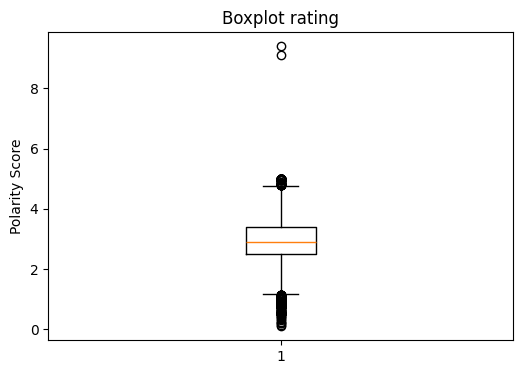

Outlier values:
160     0.50
1907    0.55
2513    0.50
2515    0.50
2747    0.10
2771    0.55
3051    9.10
3138    0.55
3165    0.55
3175    0.45
3252    0.55
3257    0.55
3272    0.20
3361    0.25
3403    0.50
3465    0.20
3474    0.55
3619    0.40
3645    0.50
3655    0.35
3688    9.40
3690    0.30
3778    0.15
3800    0.40
4058    0.50
4461    0.50
4519    0.50
4869    0.50
5800    0.50
6323    0.50
Name: Polarity Score, dtype: float64


In [ ]:
# mengecek outlier menggunakan z-score
plt.figure(figsize=(6, 4))
plt.boxplot(df_ratings["Polarity Score"])
plt.title(f'Boxplot {"rating"}')
plt.ylabel("Polarity Score")
plt.show()

z_scores = stats.zscore(df_ratings["Polarity Score"])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outlier_values = df_ratings["Polarity Score"][outliers]

print("Outlier values:")
print(outlier_values)

In [ ]:
# Mengubah nilai Outliers
# Nilai Outliers yang lebih dari 5 dibagi nilainya dengan 2
df_ratings.loc[df_ratings['Polarity Score'] > 5, 'Polarity Score'] = df_ratings.loc[df_ratings['Polarity Score'] > 5, 'Polarity Score'] / 2

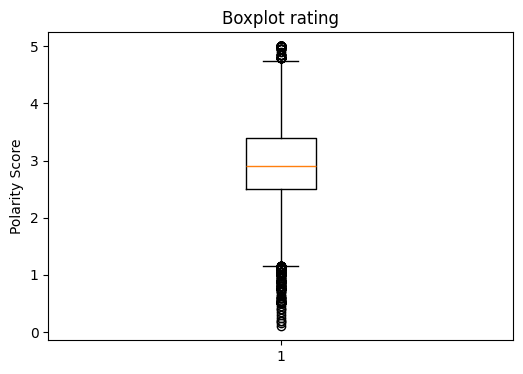

In [ ]:
# mengecek outlier menggunakan z-score
plt.figure(figsize=(6, 4))
plt.boxplot(df_ratings["Polarity Score"])
plt.title(f'Boxplot {"rating"}')
plt.ylabel("Polarity Score")
plt.show()

z_scores = stats.zscore(df_ratings["Polarity Score"])
threshold = 3
outliers = (z_scores > threshold) | (z_scores < -threshold)
outlier_values = df_ratings["Polarity Score"][outliers]


In [ ]:
# Mencari duplikat berdasarkan 'nama user' dan 'film'
duplikat = df_ratings.duplicated(subset=['Nama Akun', 'Film'], keep=False)

# Menampilkan baris duplikat
print("Baris duplikat:")
print(df_ratings[duplikat])

Baris duplikat:
Empty DataFrame
Columns: [Nama Akun, Film, Polarity Score, user_id]
Index: []


In [ ]:
#Ganti nama kolom
# df_ratings = df_ratings.drop('Unnamed: 0', axis=1)
df_ratings = df_ratings.rename(columns={'Nama Akun': 'nama_akun'})
# df_ratings = df_ratings.rename(columns={'Film': 'judul_film'})
# df_ratings = df_ratings.rename(columns={'Polarity Score': 'rating'})

In [ ]:
df_ratings.head()

,nama_akun,Film,Polarity Score,user_id
0,AnakNonton,3 Days to Kill,2.840909,1
1,AnakNonton,Posesif,3.666667,1
2,AnakNonton,Real Steel,3.375000,1
3,AnakNonton,Rise,2.686080,1
4,AnakNonton,Safe House,3.500000,1


## **Template Dataset hasil Prediksi**

In [ ]:
#Dataset untuk hasil prediksi rating
columns = []
columns.append('nama film')
accounts = df_ratings.nama_akun.unique()
for account_index in range (0, len(accounts)):
  columns.append(accounts[account_index])

data_entries = []
films = df_film.Film
for film_index in range (0, len(films)):
  data_entries.append({'nama film' : films[film_index]})

df = pd.DataFrame(columns=columns)
# Use pd.concat instead of append
df = pd.concat([df, pd.DataFrame(data_entries)], ignore_index=True) # Use pd.concat to concatenate the existing DataFrame with the new DataFrame created from data_entries
df.fillna(0, inplace=True)

<ipython-input-15-04375353384e>:16: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.fillna(0, inplace=True)


In [ ]:
#Merging nama akun dan judul film sebagai kolom, serta rating sebagai value
for rating_index in range(len(df_ratings)):
    df[df_ratings["nama_akun"][rating_index]].loc[df["nama film"] == df_ratings["Film"][rating_index]] = round(df_ratings["Polarity Score"][rating_index],2)

df

<ipython-input-16-303bc3ec9444>:3: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df[df_ratings["nama_akun"][rating_index]].loc[df["nama film"] == df_ratings["Film"][rating_index]] = round(df_ratings["Polarity Score"][rating_index],2)
<ipytho

,nama film,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
0,14 Cameras,0.00,0.0,0.00,0.00,0.0,0.00,0.0,2.30,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0
1,17 Again,0.00,0.0,0.00,2.25,0.0,0.00,0.0,3.20,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0
2,1BR,0.00,0.0,0.00,0.00,0.0,0.00,0.0,2.90,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0
3,3 Days to Kill,2.84,0.0,0.00,2.50,0.0,2.36,0.0,3.10,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0
4,3 Idiots,0.00,0.0,2.25,0.00,0.0,0.00,0.0,4.20,0.0,...,0.0,0.0,2.44,0.0,0.0,0.00,0.0,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
849,Zombieland,0.00,0.0,3.28,3.22,0.0,2.50,0.0,3.80,0.0,...,0.0,0.0,3.12,0.0,0.0,2.94,0.0,2.68,0.0,0.0
850,iNumber Number: Jozi Gold,0.00,0.0,0.00,0.00,0.0,0.00,0.0,2.20,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0
851,¡Que viva México!,0.00,0.0,0.00,0.00,0.0,0.00,0.0,2.75,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0
852,¿Encontró lo que buscaba?,0.00,0.0,0.00,0.00,0.0,0.00,0.0,2.65,0.0,...,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.0,0.0


### **Data Sparsity and Normalization**

In [ ]:
#Pengecekan sparsity data pada dataset untuk nilai nol
zero_count = (df.iloc[:, 1:] == 0).sum().sum()
zero_sum_total = df.iloc[:, 1:].size
sparsity_percentage = (zero_count / zero_sum_total) * 100

print(f"Jumlah nilai 0 dalam dataset: {zero_count}")
print(f"Persentase sparsity: {sparsity_percentage:.2f}%")

Jumlah nilai 0 dalam dataset: 31097
Persentase sparsity: 82.76%


In [ ]:
#Drop baris dan kolom yang miliki rating di bawah 5

def find_non_zero(row):
    return len([i for i in row if i != 0])

df['NonZero'] = df.apply(find_non_zero, axis=1)
df_film['NonZero'] = df['NonZero']

df = df[df['NonZero'] >= 5]
df_film = df_film[df_film['NonZero'] >= 5]

df = df.drop('NonZero', axis=1)
df = df.reset_index(drop=True)

df_film = df_film.drop('NonZero', axis=1)
df_film = df_film.reset_index(drop=True)

df

,nama film,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
0,14 Cameras,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.30,0.00,...,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
1,17 Again,0.00,0.00,0.00,2.25,0.00,0.00,0.00,3.20,0.00,...,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
2,1BR,0.00,0.00,0.00,0.00,0.00,0.00,0.00,2.90,0.00,...,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
3,3 Days to Kill,2.84,0.00,0.00,2.50,0.00,2.36,0.00,3.10,0.00,...,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
4,3 Idiots,0.00,0.00,2.25,0.00,0.00,0.00,0.00,4.20,0.00,...,0.0,0.0,2.44,0.00,0.0,0.00,0.00,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,You People,0.00,2.86,0.00,0.00,2.86,0.00,2.19,2.75,3.35,...,0.0,0.0,0.00,0.00,0.0,0.00,3.05,3.67,0.00,2.68
548,Young Adult,2.75,0.00,2.67,2.99,0.00,2.17,2.73,3.15,0.00,...,0.0,0.0,0.00,0.00,0.0,3.45,0.00,0.00,0.00,0.00
549,Your Place or Mine,0.00,3.04,2.50,0.00,2.93,0.00,0.00,2.85,3.17,...,0.0,0.0,0.00,2.17,0.0,0.00,3.13,3.64,0.00,0.00
550,Zodiac,0.00,0.00,3.21,0.00,0.00,3.75,0.00,3.85,0.00,...,0.0,0.0,0.00,0.00,0.0,0.00,0.00,0.00,3.38,0.00


In [ ]:
#Normalisasi data Min-Max Scaler
df_normalized = df.copy()

scaler = MinMaxScaler(feature_range=(0, 1))
columns = df.columns[1:]
df_normalized[columns] = scaler.fit_transform(df_normalized[columns])

# Hal ini dilakukan karena terdapat entry yang bertipe data integer
df['nama film'] = df['nama film'].astype(str)

df_normalized

,nama film,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
0,14 Cameras,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.479167,0.000,...,0.0,0.0,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000,0.000000
1,17 Again,0.000,0.000,0.000,0.450,0.000000,0.000000,0.000000,0.666667,0.000,...,0.0,0.0,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000,0.000000
2,1BR,0.000,0.000,0.000,0.000,0.000000,0.000000,0.000000,0.604167,0.000,...,0.0,0.0,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000,0.000000
3,3 Days to Kill,0.568,0.000,0.000,0.500,0.000000,0.578431,0.000000,0.645833,0.000,...,0.0,0.0,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.000,0.000000
4,3 Idiots,0.000,0.000,0.450,0.000,0.000000,0.000000,0.000000,0.875000,0.000,...,0.0,0.0,0.488,0.000000,0.0,0.000,0.000000,0.000000,0.000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,You People,0.000,0.572,0.000,0.000,0.662037,0.000000,0.515294,0.572917,0.670,...,0.0,0.0,0.000,0.000000,0.0,0.000,0.786082,0.815556,0.000,0.564211
548,Young Adult,0.550,0.000,0.534,0.598,0.000000,0.531863,0.642353,0.656250,0.000,...,0.0,0.0,0.000,0.000000,0.0,0.690,0.000000,0.000000,0.000,0.000000
549,Your Place or Mine,0.000,0.608,0.500,0.000,0.678241,0.000000,0.000000,0.593750,0.634,...,0.0,0.0,0.000,0.510588,0.0,0.000,0.806701,0.808889,0.000,0.000000
550,Zodiac,0.000,0.000,0.642,0.000,0.000000,0.919118,0.000000,0.802083,0.000,...,0.0,0.0,0.000,0.000000,0.0,0.000,0.000000,0.000000,0.676,0.000000


In [ ]:
transposed_df = df_normalized.T
transposed_df

,0,1,2,3,4,5,6,7,8,9,...,542,543,544,545,546,547,548,549,550,551
nama film,14 Cameras,17 Again,1BR,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Balloons,6 Days,6 Underground,65,...,World Trade Center,World's Best,Yes Man,Yo mama,You Are So Not Invited to My Bat Mitzvah,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
AnakNonton,0.0,0.0,0.0,0.568,0.0,0.0,0.0,0.0,0.0,0.578,...,0.0,0.0,0.0,0.0,0.0,0.0,0.55,0.0,0.0,0.0
BFI,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.668,...,0.0,0.758,0.0,0.0,0.0,0.572,0.0,0.608,0.0,0.0
CenayangFilm,0.0,0.0,0.0,0.0,0.45,0.0,0.0,0.0,0.62,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.534,0.5,0.642,0.656
Elbert_Reyner,0.0,0.45,0.0,0.5,0.0,0.0,0.0,0.0,0.406,0.674,...,0.0,0.0,0.0,0.0,0.0,0.0,0.598,0.0,0.0,0.644
ErikDavis,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.69213,...,0.0,0.881944,0.0,0.555556,0.0,0.662037,0.0,0.678241,0.0,0.0
GilaFilmID,0.0,0.0,0.0,0.578431,0.0,0.816176,0.0,0.0,0.759804,0.678922,...,0.551471,0.0,0.0,0.0,0.615196,0.0,0.531863,0.0,0.919118,0.612745
HabisNontonFilm,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.656471,...,0.0,0.0,0.0,0.0,0.0,0.515294,0.642353,0.0,0.0,0.0
IMDB,0.479167,0.666667,0.604167,0.645833,0.875,0.677083,0.614583,0.645833,0.635417,0.5625,...,0.625,0.5625,0.708333,0.5,0.625,0.572917,0.65625,0.59375,0.802083,0.791667
KermodeMovie,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.548,...,0.0,1.0,0.0,0.0,0.0,0.67,0.0,0.634,0.0,0.0


# **Content Based**

In [ ]:
# Mengambil kolom yang relevan dari DataFrame data untuk analisis konten
content_df = df_film[['Film', 'description', 'genre','keywords']]

# Menggabungkan kolom-kolom teks menjadi satu kolom 'Content'
content_df['content'] = content_df.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)
content_df['content']

<ipython-input-21-92c31f20879a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  content_df['content'] = content_df.apply(lambda row: ' '.join(row.dropna().astype(str)), axis=1)


,content
0,14 Cameras When a family of five rent a beauti...
1,"17 Again 0 ['Comedy', 'Drama', 'Fantasy'] body..."
2,"1BR 0 ['Drama', 'Horror', 'Thriller'] communit..."
3,3 Days to Kill A dying CIA agent trying to rec...
4,"3 Idiots 0 ['Comedy', 'Drama'] hairy chest,mot..."
...,...
547,You People Follows a new couple and their fami...
548,"Young Adult 0 ['Comedy', 'Drama'] emotional br..."
549,Your Place or Mine Two long-distance best frie...
550,"Zodiac 0 ['Crime', 'Drama', 'Mystery'] zodiac ..."


In [ ]:
# Menghitung TF-IDF dari teks film
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=300)
tfidf_matrix = tfidf_vectorizer.fit_transform(content_df['content'])

# Menghitung similarity score menggunakan cosine similarity
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
tfidf_sim = pd.DataFrame(cosine_sim, index=df_normalized['nama film'].values, columns=df_normalized['nama film'].values)
tfidf_sim

,14 Cameras,17 Again,1BR,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Balloons,6 Days,6 Underground,65,...,World Trade Center,World's Best,Yes Man,Yo mama,You Are So Not Invited to My Bat Mitzvah,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
14 Cameras,1.000000,0.000000,0.181054,0.000000,0.000000,0.000000,0.000000,0.121929,0.070387,0.000000,...,0.028713,0.035768,0.000000,0.000000,0.000000,0.042645,0.000000,0.000000,0.042162,0.028556
17 Again,0.000000,1.000000,0.038319,0.037515,0.072241,0.043516,0.026455,0.016937,0.000000,0.016303,...,0.014322,0.017900,0.038190,0.162457,0.151435,0.021342,0.566209,0.130874,0.017326,0.016547
1BR,0.181054,0.038319,1.000000,0.033325,0.064173,0.000000,0.060542,0.134094,0.197612,0.037308,...,0.113388,0.000000,0.000000,0.000000,0.046582,0.142754,0.057736,0.000000,0.039651,0.080170
3 Days to Kill,0.000000,0.037515,0.033325,1.000000,0.062826,0.084900,0.264925,0.213195,0.059842,0.041965,...,0.012456,0.050422,0.033213,0.141286,0.045604,0.060116,0.056525,0.015091,0.015068,0.032283
3 Idiots,0.000000,0.072241,0.064173,0.062826,1.000000,0.072876,0.044304,0.028365,0.000000,0.027302,...,0.023985,0.385970,0.063958,0.272069,0.087819,0.035742,0.108848,0.029059,0.029017,0.027711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,0.042645,0.021342,0.142754,0.060116,0.035742,0.035189,0.000000,0.000000,0.000000,0.000000,...,0.073797,0.160515,0.087085,0.131371,0.025944,1.000000,0.032157,0.039567,0.000000,0.013381
Young Adult,0.000000,0.566209,0.057736,0.056525,0.108848,0.065566,0.039860,0.025520,0.000000,0.024563,...,0.021580,0.026971,0.057543,0.244779,0.346673,0.032157,1.000000,0.026144,0.026106,0.024932
Your Place or Mine,0.000000,0.130874,0.000000,0.015091,0.029059,0.085265,0.000000,0.000000,0.000000,0.028294,...,0.000000,0.199565,0.070803,0.106809,0.056420,0.039567,0.026144,1.000000,0.000000,0.010879
Zodiac,0.042162,0.017326,0.039651,0.015068,0.029017,0.000000,0.027375,0.017527,0.000000,0.134411,...,0.014820,0.000000,0.000000,0.000000,0.021063,0.000000,0.026106,0.000000,1.000000,0.000000


## **Recomendasi**

In [ ]:
# Fungsi untuk mendapatkan rekomendasi film berdasarkan film yang diinginkan
def get_recommendations(film_title, cosine_sim=cosine_sim):
    idx = content_df[content_df['Film'] == film_title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]  # Ambil 10 film paling mirip

    # Ambil index dan score dari film
    film_indices = [i[0] for i in sim_scores]
    scores = [i[1] for i in sim_scores]

    # Buat DataFrame hasil rekomendasi
    recommendations = content_df[['Film']].iloc[film_indices].copy()
    recommendations['similarity_score'] = scores

    return recommendations

In [ ]:
# Mendapatkan 10 rekomendasi film untuk film dengan judul 'Ip Man'
recommended_films = get_recommendations('Ip Man')
print(recommended_films)

                       Film  similarity_score
247                Merantau          0.590111
72             Buffalo Boys          0.559508
205  Kickboxer: Retaliation          0.544033
278          Ninja Assassin          0.540258
252                 Mile 22          0.522396
210           Kung Fu Panda          0.443952
158                Headshot          0.432801
135                  Furies          0.315107
5            5 Cowok Jagoan          0.301948
90      Clash of the Titans          0.289648


In [ ]:
target = df_normalized.copy()
target = target.T
target_pred = target.values

In [ ]:
df_result_tfidf = target
tfidf_cbf_result = df_normalized.values

# iterasi untuk setiap user
for idx_user in range(1, len(df_result_tfidf)):
    # iterasi untuk setiap item
    for idx_item in range(0, len(df_normalized)):
        if tfidf_cbf_result[idx_item][idx_user] == 0:
            print(f"Processing user {idx_user} & item {idx_item}")
            item_sim = list(enumerate(cosine_sim[idx_item]))
            item_rating = list(df_normalized[df_normalized.columns[idx_user]])
            item_sim = [(idx, score) for idx, score in item_sim if idx not in item_rating and score > 0 and idx != idx_item]

            pred_rating = 0
            count = 0

            for idx, score in item_sim:
                similar_item_rating = target_pred[idx_user][idx]
                pred_rating = pred_rating + similar_item_rating * score
                count = count + score

            if count == 0:
                tfidf_cbf_result[idx_item][idx_user] = 0
            else:
                pred_rating = pred_rating / count
                tfidf_cbf_result[idx_item][idx_user] = pred_rating

ResultCBF_TFIDF = pd.DataFrame(tfidf_cbf_result, columns=df_normalized.columns)

Streaming output truncated to the last 5000 lines.
Processing user 34 & item 409
Processing user 34 & item 410
Processing user 34 & item 411
Processing user 34 & item 415
Processing user 34 & item 417
Processing user 34 & item 418
Processing user 34 & item 419
Processing user 34 & item 420
Processing user 34 & item 424
Processing user 34 & item 425
Processing user 34 & item 426
Processing user 34 & item 428
Processing user 34 & item 429
Processing user 34 & item 430
Processing user 34 & item 431
Processing user 34 & item 432
Processing user 34 & item 435
Processing user 34 & item 436
Processing user 34 & item 438
Processing user 34 & item 440
Processing user 34 & item 443
Processing user 34 & item 449
Processing user 34 & item 452
Processing user 34 & item 453
Processing user 34 & item 454
Processing user 34 & item 456
Processing user 34 & item 459
Processing user 34 & item 460
Processing user 34 & item 464
Processing user 34 & item 468
Processing user 34 & item 469
Processing user 34 

In [ ]:
print(target.shape)
print(len(df_result_tfidf))
print(len(tfidf_cbf_result))

(45, 552)
45
552


In [ ]:
ResultCBF_TFIDF

,nama film,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
0,14 Cameras,0.042145,0.038789,0.151839,0.197507,0.045926,0.313281,0.103559,0.479167,0.023673,...,0.005532,0.068927,0.062242,0.060349,0.079396,0.078178,0.071948,0.043846,0.066975,0.030177
1,17 Again,0.080384,0.04697,0.140043,0.45,0.067399,0.302507,0.116662,0.666667,0.038752,...,0.018581,0.126209,0.040038,0.094425,0.0735,0.102767,0.103442,0.097333,0.050606,0.043194
2,1BR,0.055518,0.044544,0.156625,0.213557,0.041485,0.288661,0.127899,0.604167,0.031133,...,0.011711,0.107724,0.070844,0.062241,0.101633,0.089691,0.074342,0.054296,0.062234,0.043161
3,3 Days to Kill,0.568,0.056553,0.162265,0.5,0.074715,0.578431,0.113897,0.645833,0.0541,...,0.014414,0.119845,0.067059,0.072926,0.096927,0.092409,0.128442,0.073022,0.061652,0.066532
4,3 Idiots,0.068871,0.054479,0.45,0.13039,0.077144,0.263375,0.106563,0.875,0.054028,...,0.009687,0.086625,0.488,0.053562,0.052697,0.083647,0.133186,0.068999,0.047027,0.045871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,You People,0.066874,0.572,0.170543,0.17276,0.662037,0.30413,0.515294,0.572917,0.67,...,0.033801,0.145517,0.053841,0.106841,0.096027,0.107701,0.786082,0.815556,0.062555,0.564211
548,Young Adult,0.55,0.04308,0.534,0.598,0.062279,0.531863,0.642353,0.65625,0.031821,...,0.0164,0.124905,0.038382,0.089628,0.081524,0.69,0.102263,0.099561,0.050616,0.046917
549,Your Place or Mine,0.073386,0.608,0.5,0.145452,0.678241,0.302514,0.124474,0.59375,0.634,...,0.023268,0.095322,0.054194,0.510588,0.067097,0.079941,0.806701,0.808889,0.067296,0.051001
550,Zodiac,0.046369,0.055884,0.642,0.171578,0.033228,0.919118,0.100778,0.802083,0.024209,...,0.007928,0.077562,0.076739,0.047561,0.064261,0.110352,0.078168,0.047561,0.676,0.030827


## **Evaluasi**

In [ ]:
df_actualcbf = df_normalized.copy()
df_predcbf = ResultCBF_TFIDF.copy()

df_actual_values = df_actualcbf.drop(columns='nama film').to_numpy()
df_pred_values = df_predcbf.drop(columns='nama film').to_numpy()

y_actualcbf = df_actual_values.flatten()
y_predcbf = df_pred_values.flatten()

In [ ]:
MAE_CBF = mean_absolute_error(y_actualcbf, y_predcbf)
MSE_CBF = mean_squared_error(y_actualcbf, y_predcbf)
rmse_cbf_tfidf = math.sqrt(MSE_CBF)

print("Mean Absolute Error (MAE):", MAE_CBF)
print("Root Mean Square Error (RMSE):", rmse_cbf_tfidf)

Mean Absolute Error (MAE): 0.07852911227601209
Root Mean Square Error (RMSE): 0.11924692740849778


# **Collaborative (RBM)**

In [ ]:
df_ratings.head()

,nama_akun,Film,Polarity Score,user_id
0,AnakNonton,3 Days to Kill,2.840909,1
1,AnakNonton,Posesif,3.666667,1
2,AnakNonton,Real Steel,3.375000,1
3,AnakNonton,Rise,2.686080,1
4,AnakNonton,Safe House,3.500000,1


In [ ]:
# Matriks user-rating
user_rating_df = df_ratings.pivot(index='user_id', columns='Film', values='Polarity Score')
user_rating_df.head()

Film,14 Cameras,17 Again,1BR,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Balloons,6 Days,6 Underground,65,...,Your Place or Mine,Zathura: A Space Adventure,Znachor,Zodiac,Zom 100: Zombie ni Naru made ni Shitai 100 no Koto,Zombieland,iNumber Number: Jozi Gold,¡Que viva México!,¿Encontró lo que buscaba?,Özel Ders
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,2.840909,NaN,NaN,NaN,NaN,NaN,2.890152,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.338967,...,3.038351,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.25,NaN,NaN,NaN,3.104167,NaN,...,2.500000,NaN,NaN,3.208333,NaN,3.275742,NaN,NaN,NaN,NaN
4,NaN,2.25,NaN,2.500000,NaN,NaN,NaN,NaN,2.031250,3.367148,...,NaN,NaN,NaN,NaN,NaN,3.217593,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.993959,...,2.933278,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# 2. Min-Max Normalization
scaler = MinMaxScaler(feature_range=(0, 1))

# Select only numerical columns for normalization
numerical_df = df.select_dtypes(include=np.number)

# Mengisi nilai NaN dengan 0 dan normalisasi dengan Min-Max
norm_user_rating_df = pd.DataFrame(scaler.fit_transform(numerical_df),
                                  columns=numerical_df.columns,  # Use numerical_df.columns for columns
                                  index=numerical_df.index)  # Use numerical_df.index for index

# Menampilkan beberapa baris pertama hasil normalisasi
#print(norm_user_rating_df.head())

# Mengonversi dataframe ke array untuk digunakan lebih lanjut
trX = norm_user_rating_df.values
trX = trX.T
#print(trX[0:5])

In [ ]:
print(trX[0:5])

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.608      0.         0.        ]
 [0.         0.         0.         ... 0.5        0.642      0.656     ]
 [0.         0.45       0.         ... 0.         0.         0.644     ]
 [0.         0.         0.         ... 0.67824074 0.         0.        ]]


## **Setting Model's Parameter**

**Kita akan memulai dengan terlebih dahulu menentukan jumlah neurons di hidden layers, lalu membuat placeholder variables untuk menyimpan visible layer biases, hidden layer biases, dan weights yang menghubungkan hidden layer dengan visible layer.**

**Restricted Boltzmann Machine (RBM) adalah jenis jaringan saraf yang digunakan dalam pembelajaran mendalam, khususnya dalam konteks pembelajaran tidak terawasi (Unsupervised). RBM terdiri dari dua lapisan: lapisan visible (yang mewakili data input) dan lapisan hidden (yang menangkap fitur tersembunyi dari data).**

**Ciri khas dari RBM adalah bahwa tidak ada koneksi antara neuron dalam lapisan yang sama, sehingga disebut "restricted" (terbatas). Koneksi hanya ada antara neuron di lapisan visible dan neuron di lapisan hidden.**

In [ ]:
hiddenUnits = 512
visibleUnits =  len(df['nama film'])
vb = tf.placeholder("float", [visibleUnits]) #Number of unique movies
hb = tf.placeholder("float", [hiddenUnits]) #Number of features we're going to learn
W = tf.placeholder("float", [visibleUnits, hiddenUnits])


In [ ]:
#Phase 1: Input Processing
v0 = tf.placeholder("float", [None, visibleUnits])
_h0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
h0 = tf.nn.relu(tf.sign(_h0 - tf.random_uniform(tf.shape(_h0))))
#Phase 2: Reconstruction
_v1 = tf.nn.sigmoid(tf.matmul(h0, tf.transpose(W)) + vb)
v1 = tf.nn.relu(tf.sign(_v1 - tf.random_uniform(tf.shape(_v1))))
h1 = tf.nn.sigmoid(tf.matmul(v1, W) + hb)


In [ ]:
#Learning rate
alpha = 0.1
#Create the gradients
w_pos_grad = tf.matmul(tf.transpose(v0), h0)
w_neg_grad = tf.matmul(tf.transpose(v1), h1)
#Calculate the Contrastive Divergence to maximize
CD = (w_pos_grad - w_neg_grad) / tf.to_float(tf.shape(v0)[0])
#Create methods to update the weights and biases
update_w = W + alpha * CD
update_vb = vb + alpha * tf.reduce_mean(v0 - v1, 0)
update_hb = hb + alpha * tf.reduce_mean(h0 - h1, 0)

Instructions for updating:
Use `tf.cast` instead.


In [ ]:
#mse
err = v0 - v1
err_sum = tf.reduce_mean(err * err)

#mae
# err = tf.abs(v0 - v1)
# err_sum = tf.reduce_mean(err)

#rmse
# err = v0 - v1  # Hitung selisih
# mse = tf.reduce_mean(err * err)  # Hitung MSE
# err_sum = tf.sqrt(mse)  # Hitung akar kuadrat dari MSE

In [ ]:
#Current weight
cur_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Current visible unit biases
cur_vb = np.zeros([visibleUnits], np.float32)
#Current hidden unit biases
cur_hb = np.zeros([hiddenUnits], np.float32)
#Previous weight
prv_w = np.zeros([visibleUnits, hiddenUnits], np.float32)
#Previous visible unit biases
prv_vb = np.zeros([visibleUnits], np.float32)
#Previous hidden unit biases
prv_hb = np.zeros([hiddenUnits], np.float32)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

## **Training Model**

Epoch 1/100 - MSE: 0.14366376399993896, MAE: 0.1910080760717392, RMSE: 0.3790300190448761
Epoch 2/100 - MSE: 0.1337788999080658, MAE: 0.18521510064601898, RMSE: 0.3657579720020294
Epoch 3/100 - MSE: 0.13429474830627441, MAE: 0.1874302625656128, RMSE: 0.36646246910095215
Epoch 4/100 - MSE: 0.13354164361953735, MAE: 0.1809661090373993, RMSE: 0.3654335141181946
Epoch 5/100 - MSE: 0.12319696694612503, MAE: 0.17630672454833984, RMSE: 0.3509942591190338
Epoch 6/100 - MSE: 0.12490391731262207, MAE: 0.17828111350536346, RMSE: 0.3534174859523773
Epoch 7/100 - MSE: 0.12295646965503693, MAE: 0.17334812879562378, RMSE: 0.35065150260925293
Epoch 8/100 - MSE: 0.11524581164121628, MAE: 0.170379638671875, RMSE: 0.3394787311553955
Epoch 9/100 - MSE: 0.11754655092954636, MAE: 0.1675562858581543, RMSE: 0.34285062551498413
Epoch 10/100 - MSE: 0.11419244855642319, MAE: 0.16579683125019073, RMSE: 0.33792373538017273
Epoch 11/100 - MSE: 0.10966653376817703, MAE: 0.1607680320739746, RMSE: 0.331159383058548
Ep

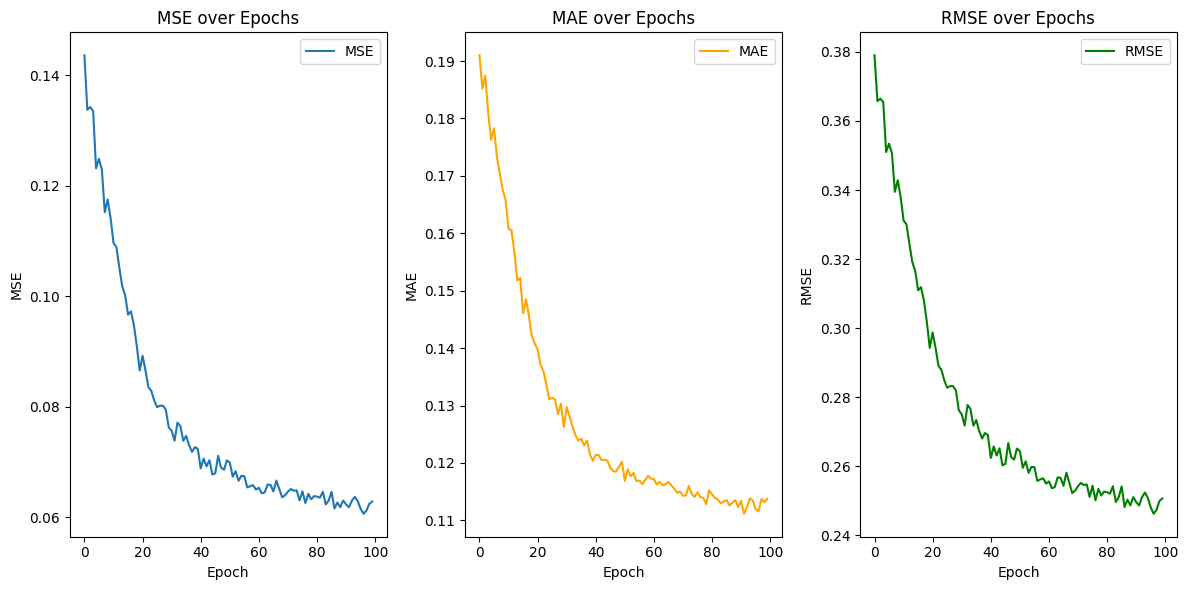

In [ ]:
# Contoh parameter
epochs = 100
batchsize = 6
errors = []
mae_values = []  # Untuk menyimpan nilai MAE setiap epoch
rmse_values = []  # Untuk menyimpan nilai RMSE setiap epoch

# Loop pelatihan
for i in range(epochs):
    for start, end in zip(range(0, len(trX), batchsize), range(batchsize, len(trX), batchsize)):
        batch = trX[start:end]
        cur_w = sess.run(update_w, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_vb = sess.run(update_vb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        cur_hb = sess.run(update_hb, feed_dict={v0: batch, W: prv_w, vb: prv_vb, hb: prv_hb})
        prv_w = cur_w
        prv_vb = cur_vb
        prv_hb = cur_hb

    # Hitung err_sum (MSE) untuk seluruh data pelatihan
    err_sum_value = sess.run(err_sum, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb})
    errors.append(err_sum_value)

    # Hitung MAE
    err_mae = tf.abs(v0 - v1)  # Contoh perhitungan error
    mae = tf.reduce_mean(err_mae)
    mae_value = sess.run(mae, feed_dict={v0: trX, W: cur_w, vb: cur_vb, hb: cur_hb})
    mae_values.append(mae_value)

    # Hitung RMSE
    rmse = tf.sqrt(err_sum_value)  # RMSE adalah akar kuadrat dari MSE
    rmse_value = sess.run(rmse)  # Eksekusi symbolic tensor untuk mendapatkan nilai numerik
    rmse_values.append(rmse_value)

    # Cetak nilai error
    print(f"Epoch {i+1}/{epochs} - MSE: {errors[-1]}, MAE: {mae_values[-1]}, RMSE: {rmse_values[-1]}")

# Plot nilai error
plt.figure(figsize=(12, 6))

# Plot MSE
plt.subplot(1, 3, 1)
plt.plot(errors, label='MSE')
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.title('MSE over Epochs')
plt.legend()

# Plot MAE
plt.subplot(1, 3, 2)
plt.plot(mae_values, label='MAE', color='orange')
plt.ylabel('MAE')
plt.xlabel('Epoch')
plt.title('MAE over Epochs')
plt.legend()

# Plot RMSE
plt.subplot(1, 3, 3)
plt.plot(rmse_values, label='RMSE', color='green')
plt.ylabel('RMSE')
plt.xlabel('Epoch')
plt.title('RMSE over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

## **Rekomendasi**

In [ ]:
#Selecting the input user id
mock_user_id = 34
#inputUser = trX[mock_user_id-1].reshape(1, -1)
#inputUser[0:5]

In [ ]:
#Feeding in the user and reconstructing the input
hh0 = tf.nn.sigmoid(tf.matmul(v0, W) + hb)
vv1 = tf.nn.sigmoid(tf.matmul(hh0, tf.transpose(W)) + vb)
#feed = sess.run(hh0, feed_dict={ v0: inputUser, W: prv_w, hb: prv_hb})
feed = sess.run(hh0, feed_dict={ v0: trX, W: prv_w, hb: prv_hb})
rec = sess.run(vv1, feed_dict={ hh0: feed, W: prv_w, vb: prv_vb})
print(rec)

[[2.2263828e-04 3.6304852e-04 1.8043972e-04 ... 2.0411771e-03
  2.5805269e-04 6.4514736e-03]
 [1.7439293e-04 7.1709248e-05 1.8719152e-04 ... 5.9357679e-01
  1.5722848e-04 4.1442219e-04]
 [1.1470350e-02 4.6063582e-03 3.8213693e-03 ... 2.2615384e-01
  6.4396292e-01 5.3786558e-01]
 ...
 [3.1928968e-04 4.0461516e-04 1.8182379e-04 ... 7.3361659e-01
  1.9182377e-03 3.5966715e-01]
 [1.8251610e-03 1.3258001e-02 3.2832029e-03 ... 5.0242507e-04
  1.2309876e-01 3.1752771e-01]
 [1.4556260e-04 5.1461004e-05 9.8018631e-05 ... 1.6161259e-01
  3.9991422e-04 3.9764319e-04]]


In [ ]:
pred_result_df = pd.DataFrame(rec, index=norm_user_rating_df.columns, columns = df_normalized['nama film'])
pred_result_df

nama film,14 Cameras,17 Again,1BR,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Balloons,6 Days,6 Underground,65,...,World Trade Center,World's Best,Yes Man,Yo mama,You Are So Not Invited to My Bat Mitzvah,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
AnakNonton,0.000223,3.630485e-04,0.000180,0.492814,0.001103,0.002699,5.845743e-05,0.000608,0.006380,0.842921,...,1.253845e-04,0.000628,1.811287e-04,0.000150,4.808426e-04,0.027851,0.482962,0.002041,0.000258,0.006451
BFI,0.000174,7.170925e-05,0.000187,0.000262,0.000282,0.000097,3.873018e-05,0.000240,0.000099,0.903677,...,1.711092e-05,0.817213,8.525841e-05,0.001523,5.840444e-05,0.907767,0.000237,0.593577,0.000157,0.000414
CenayangFilm,0.011470,4.606358e-03,0.003821,0.013141,0.552831,0.013180,5.638664e-03,0.006655,0.778315,0.143279,...,4.669612e-03,0.003459,8.402735e-03,0.001609,2.093318e-02,0.064563,0.527932,0.226154,0.643963,0.537866
Elbert_Reyner,0.011472,5.527701e-01,0.007281,0.594723,0.032370,0.016807,5.834666e-03,0.051560,0.404048,0.801395,...,3.943470e-03,0.001751,1.833265e-02,0.001242,6.866728e-03,0.044459,0.521188,0.018173,0.017473,0.673953
ErikDavis,0.000342,9.009222e-05,0.000370,0.000219,0.000251,0.000186,9.599974e-05,0.000211,0.000106,0.875352,...,4.655996e-05,0.937706,1.489369e-04,0.190848,1.198212e-04,0.914471,0.000989,0.590283,0.000191,0.000257
GilaFilmID,0.013925,2.734209e-02,0.006889,0.531983,0.029578,0.819584,1.462769e-02,0.027005,0.683513,0.590891,...,5.768210e-01,0.002391,3.666522e-02,0.005265,7.303165e-01,0.020861,0.599323,0.006895,0.920253,0.519462
HabisNontonFilm,0.001530,1.206978e-03,0.001275,0.002152,0.006864,0.002224,3.820038e-04,0.001564,0.010344,0.474467,...,5.608455e-04,0.000092,4.524014e-03,0.000600,2.294786e-03,0.805335,0.736533,0.002769,0.007493,0.011410
IMDB,0.454754,4.796740e-01,0.592466,0.417804,0.771477,0.260060,5.905265e-01,0.542233,0.407348,0.480160,...,5.265293e-01,0.662528,5.964529e-01,0.490015,6.397151e-01,0.453825,0.531859,0.381874,0.591199,0.565017
KermodeMovie,0.000066,2.304505e-05,0.000074,0.000095,0.000435,0.000184,1.147188e-05,0.000080,0.000066,0.735293,...,6.764663e-06,0.980610,2.417549e-05,0.000833,3.075940e-05,0.922964,0.000146,0.505724,0.000088,0.000320
Metacritic Metascore,0.396806,4.551054e-01,0.728527,0.515120,0.862215,0.007487,6.821307e-01,0.603658,0.382706,0.034749,...,4.678139e-01,0.093405,6.127571e-01,0.044670,6.704289e-02,0.098187,0.802657,0.025149,0.905778,0.778341


In [ ]:
df_cf_pred = df_film[['Film', 'description', 'genre','keywords']].copy()
scored_movies_df_mock = df_cf_pred[df_cf_pred['Film'].isin(df['nama film'])]
scored_movies_df_mock = scored_movies_df_mock.assign(RecommendationScore = rec[mock_user_id-1])
scored_movies_df_mock.sort_values(["RecommendationScore"], ascending=False).head(10)

,Film,description,genre,keywords,RecommendationScore
78,Casino Royale,"After earning 00 status and a licence to kill,...","['Action', 'Adventure', 'Thriller']","poker,james bond character,poker game,cleavage...",0.998103
285,Ocean's Thirteen,0,"['Crime', 'Thriller']","revenge,casino,heist,comeuppance,hubris",0.995359
437,The Killing of a Sacred Deer,0,"['Drama', 'Horror', 'Mystery']","greek tragedy,recovering alcoholic,death curse...",0.993000
423,The Edge of Seventeen,0,"['Comedy', 'Drama']","adolescence,coming of age film,high school,dep...",0.987545
465,The Perfect Date,"To save up for college, Brooks Rattigan create...","['Comedy', 'Romance']","father son relationship,reference to elon musk...",0.980913
18,A Perfect Fit,Sparks fly when a fashion blogger in Bali meet...,"['Comedy', 'Drama', 'Romance']","love,fashion,parent,friendship",0.941384
474,The Runaways,0,"['Biography', 'Drama', 'Music']","revisionist history,feminist film,feminism,fem...",0.915627
91,Click,A workaholic architect finds a universal remot...,"['Comedy', 'Drama', 'Fantasy']","remote control,workaholic,architect,employer e...",0.910874
226,Lincoln,"As the American Civil War continues to rage, A...","['Biography', 'Drama', 'History']","based on real person,american politics,bearded...",0.910126
494,The Two Popes,0,"['Biography', 'Comedy', 'Drama']","pope,catholic priest,flashback,confessional,yo...",0.909852


## **Evaluation**

In [ ]:
cf_evaluation = df_normalized.values
for user_index in range (1, len(df_normalized.columns)):
  for film_index in range (0, len(df_normalized)):
    if(cf_evaluation[film_index][user_index] != 0):
      cf_evaluation[film_index][user_index] = rec[user_index-1][film_index]
cf_evaluation_df = pd.DataFrame(cf_evaluation, columns=df_normalized.columns)

In [ ]:
actualcf = df_normalized.copy()
predcf = cf_evaluation_df.copy()

actual_values = actualcf.drop(columns='nama film').to_numpy()
pred_values = predcf.drop(columns='nama film').to_numpy()

y_actualcf = actual_values.flatten()
y_predcf = pred_values.flatten()

MAE_CF = mean_absolute_error(y_actualcf, y_predcf)
MSE_CF = mean_squared_error(y_actualcf, y_predcf)
rmse_cf_rbm = math.sqrt(MSE_CF)

print("Mean Absolute Error (MAE):", MAE_CF)
print("Root Mean Square Error (RMSE):", rmse_cf_rbm)

Mean Absolute Error (MAE): 0.028595236268768268
Root Mean Square Error (RMSE): 0.07489805958824586


# **Weighted Hybrid Filtering**

In [ ]:
#Buat Template dataset baru untuk nilai prediksi
new_df = df_normalized.values
for user_index in range (1, len(df_normalized.columns)):
  for film_index in range (0, len(df_normalized)):
    if(new_df[film_index][user_index] == 0):
      new_df[film_index][user_index] = rec[user_index-1][film_index]
new_df = pd.DataFrame(new_df, columns=df_normalized.columns)
new_df

,nama film,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
0,14 Cameras,0.000223,0.000174,0.01147,0.011472,0.000342,0.013925,0.00153,0.479167,0.000066,...,0.000003,0.000572,0.000187,0.000216,0.001251,0.001683,0.002635,0.000319,0.001825,0.000146
1,17 Again,0.000363,0.000072,0.004606,0.45,0.00009,0.027342,0.001207,0.666667,0.000023,...,0.000002,0.000564,0.000263,0.000131,0.000628,0.00197,0.000738,0.000405,0.013258,0.000051
2,1BR,0.00018,0.000187,0.003821,0.007281,0.00037,0.006889,0.001275,0.604167,0.000074,...,0.000004,0.000268,0.000147,0.000113,0.000884,0.001036,0.002422,0.000182,0.003283,0.000098
3,3 Days to Kill,0.568,0.000262,0.013141,0.5,0.000219,0.578431,0.002152,0.645833,0.000095,...,0.000037,0.002545,0.004464,0.001652,0.007872,0.008938,0.000916,0.003387,0.051179,0.000345
4,3 Idiots,0.001103,0.000282,0.45,0.03237,0.000251,0.029578,0.006864,0.875,0.000435,...,0.000025,0.00248,0.488,0.000622,0.006025,0.00353,0.001465,0.000813,0.167331,0.000229
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,You People,0.027851,0.572,0.064563,0.044459,0.662037,0.020861,0.515294,0.572917,0.67,...,0.051777,0.027821,0.02784,0.020822,0.016604,0.016218,0.786082,0.815556,0.029534,0.564211
548,Young Adult,0.55,0.000237,0.534,0.598,0.000989,0.531863,0.642353,0.65625,0.000146,...,0.000113,0.009421,0.002206,0.012572,0.005612,0.69,0.003448,0.002984,0.044336,0.000859
549,Your Place or Mine,0.002041,0.608,0.5,0.018173,0.678241,0.006895,0.002769,0.59375,0.634,...,0.000023,0.004797,0.000567,0.510588,0.000901,0.003043,0.806701,0.808889,0.000502,0.161613
550,Zodiac,0.000258,0.000157,0.642,0.017473,0.000191,0.919118,0.007493,0.802083,0.000088,...,0.000006,0.000587,0.000472,0.000086,0.000897,0.002626,0.003072,0.001918,0.676,0.0004


## **Penentuan Weight terbaik berdasarkan nilai RMSE**

In [ ]:
# Cari bobot terbaik
best_rmse = float('inf')
best_weights = (0, 0)

temp_hybrid_pred = new_df.copy()
temp_hybrid_values = temp_hybrid_pred.drop(columns='nama film').to_numpy()
temp_y_hybrid_pred = temp_hybrid_values.flatten()


for w_cb in np.arange(0.2, 0.6, 0.1):
    w_cf = 1.0 - w_cb
    y_hybrid_pred = w_cb * y_predcbf + w_cf * temp_y_hybrid_pred

    rmse = math.sqrt(mean_squared_error(y_actualcbf, y_hybrid_pred))
    mae = mean_absolute_error(y_actualcbf, y_hybrid_pred)
    print(f"w_cb={w_cb:.1f}, w_cf={w_cf:.1f} → RMSE={rmse:.4f}  → MAE={mae:.4f}")

    if rmse < best_rmse:
        best_rmse = rmse
        best_weights = (w_cb, w_cf)

w_cb=0.2, w_cf=0.8 → RMSE=0.0363  → MAE=0.0204
w_cb=0.3, w_cf=0.7 → RMSE=0.0457  → MAE=0.0277
w_cb=0.4, w_cf=0.6 → RMSE=0.0557  → MAE=0.0350
w_cb=0.5, w_cf=0.5 → RMSE=0.0660  → MAE=0.0422


In [ ]:
print(f"\n✅ Best Weights: CB={best_weights[0]:.2f}, CF={best_weights[1]:.2f}, RMSE={best_rmse:.4f}")


✅ Best Weights: CB=0.20, CF=0.80, RMSE=0.0363


## **Merging nilai prediksi berdasarkan weight terbaik**

In [ ]:
#df_hybrid_pred = df.copy()
whf_result = df_normalized.values
w_cb = best_weights[0]
w_cf = best_weights[1]

for account_index in range(1, len(df.columns)):
    for film_index in range(0, len(df.index)):
      if whf_result[film_index][account_index] == 0:
        whf_result[film_index][account_index] = w_cb * df_predcbf.values[film_index][account_index] + w_cf * new_df.values[film_index][account_index]

df_hybrid_pred = pd.DataFrame(whf_result, columns=df.columns)



In [ ]:
df_hybrid_pred

,nama film,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
0,14 Cameras,0.008607,0.007897,0.039544,0.048679,0.009459,0.073796,0.021936,0.479167,0.004787,...,0.001108,0.014243,0.012598,0.012243,0.01688,0.016982,0.016497,0.009025,0.014855,0.006152
1,17 Again,0.016367,0.009451,0.031694,0.45,0.013552,0.082375,0.024298,0.666667,0.007769,...,0.003718,0.025693,0.008218,0.01899,0.015203,0.022129,0.021279,0.01979,0.020728,0.00868
2,1BR,0.011248,0.009059,0.034382,0.048536,0.008593,0.063243,0.026599,0.604167,0.006286,...,0.002345,0.021759,0.014287,0.012539,0.021034,0.018767,0.016806,0.011005,0.015073,0.008711
3,3 Days to Kill,0.568,0.01152,0.042966,0.5,0.015118,0.578431,0.024501,0.645833,0.010896,...,0.002912,0.026005,0.016983,0.015907,0.025683,0.025632,0.026421,0.017314,0.053274,0.013583
4,3 Idiots,0.014656,0.011121,0.45,0.051974,0.01563,0.076338,0.026803,0.875,0.011154,...,0.001957,0.019309,0.488,0.01121,0.01536,0.019553,0.027809,0.01445,0.143271,0.009357
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,You People,0.035655,0.572,0.085759,0.070119,0.662037,0.077515,0.515294,0.572917,0.67,...,0.048182,0.05136,0.03304,0.038025,0.032488,0.034515,0.786082,0.815556,0.036138,0.564211
548,Young Adult,0.55,0.008806,0.534,0.598,0.013247,0.531863,0.642353,0.65625,0.006481,...,0.00337,0.032518,0.009441,0.027984,0.020795,0.69,0.023211,0.022299,0.045592,0.01007
549,Your Place or Mine,0.01631,0.608,0.5,0.043629,0.678241,0.066019,0.02711,0.59375,0.634,...,0.004672,0.022902,0.011292,0.510588,0.014141,0.018423,0.806701,0.808889,0.013861,0.13949
550,Zodiac,0.00948,0.011303,0.642,0.048294,0.006798,0.919118,0.02615,0.802083,0.004912,...,0.00159,0.015982,0.015725,0.009581,0.01357,0.024171,0.018091,0.011047,0.676,0.006485


In [ ]:
df_hybrid_pred.to_excel("/content/drive/MyDrive/Tes TA/ResultWHF_Final.xlsx")

## **Rekomendasi**

In [ ]:
df_hf_pred = df_cf_pred.copy()
scored_movies_df_mock = df_hf_pred[df_hf_pred['Film'].isin(user_rating_df.columns)]
scored_movies_df_mock = scored_movies_df_mock.assign(RecommendationScore = df_hybrid_pred['AnakNonton'])
scored_movies_df_mock.sort_values(["RecommendationScore"], ascending=False).head(10)

,Film,description,genre,keywords,RecommendationScore
112,Drive,A mysterious Hollywood action film stuntman ge...,"['Action', 'Drama']","neo noir,nameless character,mythical hero,sile...",1.0
260,Mr. Peabody & Sherman,0,"['Animation', 'Adventure', 'Comedy']","talking dog,year 1789,early modern period,year...",0.924
301,ParaNorman,"A misunderstood boy takes on ghosts, zombies a...","['Animation', 'Adventure', 'Comedy']","horror for children,zombie,witch,curse,ghost",0.9
372,Star Trek,0,"['Action', 'Adventure', 'Sci-Fi']","star trek,cult tv,phaser,alien species,vulcan",0.8
371,Spider-Man: Into the Spider-Verse,Teen Miles Morales becomes the Spider-Man of h...,"['Animation', 'Action', 'Adventure']","multiverse,teenage superhero,wisecrack humor,p...",0.75
158,Headshot,"Uwais plays a young man who washes ashore, an ...","['Action', 'Drama', 'Thriller']","knife fight,martial arts,extreme violence,indo...",0.75
314,Posesif,A platform diving athlete in her final year of...,"['Comedy', 'Drama', 'Romance']","school,love",0.734
76,Captain Fantastic,"In the forests of the Pacific Northwest, a fat...","['Comedy', 'Drama']","funeral,suicide,suicide of mother,reference to...",0.732
336,Safe House,A young CIA agent is tasked with looking after...,"['Action', 'Thriller']","on the run,south africa,cia agent,cape town so...",0.7
225,Like & Share,Two best friends who create ASMR content toget...,['Drama'],"young adult,love,teenager,life,social media",0.7


## **Evaluasi**

In [ ]:
df_actualwhf = df_normalized.copy()
df_actualwhf_values = df_actualwhf.drop(columns='nama film').to_numpy()

df_predwhf = df_hybrid_pred.copy()
df_predwhf_values = df_predwhf.drop(columns='nama film').to_numpy()

y_actualwhf = df_actualwhf_values.flatten()
y_predwhf = df_predwhf_values.flatten()

MAE_WHF = mean_absolute_error(y_actualwhf, y_predwhf)
MSE_WHF = mean_squared_error(y_actualwhf, y_predwhf)
rmse_whf_tfidf = math.sqrt(MSE_WHF)

print("Mean Absolute Error (MAE):", MAE_WHF)
print("Root Mean Square Error (RMSE):", rmse_whf_tfidf)

Mean Absolute Error (MAE): 0.02044660199584241
Root Mean Square Error (RMSE): 0.0362736054642277


# **Collaborative FIltering (Memory Based)**

## **User Based**

In [ ]:
#User Similarity
user_similarity = cosine_similarity(df_normalized.iloc[:, 1:].T)

user_similarity__df = pd.DataFrame(user_similarity, index=df_normalized.iloc[:, 1:].columns, columns=df_normalized.iloc[:, 1:].columns)
user_similarity__df.head()

,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,Metacritic Metascore,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
AnakNonton,1.000000,0.251919,0.320738,0.367458,0.234050,0.415496,0.221449,0.340782,0.252000,0.255583,...,0.254980,0.223684,0.356624,0.335906,0.249645,0.322420,0.217984,0.311384,0.149375,0.262126
BFI,0.251919,1.000000,0.242627,0.202148,0.688209,0.233537,0.285854,0.261458,0.624827,0.000000,...,0.228117,0.214183,0.211175,0.319636,0.241962,0.301033,0.686102,0.246866,0.000000,0.674457
CenayangFilm,0.320738,0.242627,1.000000,0.472998,0.262819,0.523648,0.476504,0.519052,0.262466,0.360168,...,0.130291,0.425023,0.323711,0.387398,0.352366,0.389151,0.312079,0.365466,0.219265,0.298228
Elbert_Reyner,0.367458,0.202148,0.472998,1.000000,0.173717,0.582195,0.313075,0.564881,0.161140,0.489346,...,0.159906,0.323413,0.315002,0.380677,0.318200,0.381308,0.207930,0.355480,0.337777,0.222101
ErikDavis,0.234050,0.688209,0.262819,0.173717,1.000000,0.246158,0.312209,0.267168,0.624541,0.000000,...,0.221266,0.246152,0.159405,0.367524,0.271589,0.297533,0.711158,0.286264,0.000000,0.629371


### **Build Model**

In [ ]:
def predict_rating_user_cf(user_index, film_index):
  # Find similar users to the target user
  similar_users = user_similarity[user_index]

  # Initialize variables for weighted sum and sum of similarity scores
  weighted_sum = 0
  sum_similarity = 0
  transposed_df_values = transposed_df.values

  # Calculate the weighted sum of ratings from similar users for the target item
  for other_user_index, similarity in enumerate(similar_users):
    if other_user_index != user_index and transposed_df_values[other_user_index+1][film_index] != 0:
      weighted_sum += similarity * transposed_df_values[other_user_index+1][film_index]
      sum_similarity += similarity

  # Predict the rating
  if sum_similarity == 0:
    return 0  # Handle the case where there are no similar users with ratings for the item
  else:
    predicted_rating = weighted_sum / sum_similarity
    return predicted_rating

In [ ]:
#Prediciton
user_cf_result = df_normalized.values
for user_index in range (1, len(df_normalized.columns)):
  for film_index in range (0, len(df_normalized)):
    if(user_cf_result[film_index][user_index] == 0):
      user_cf_result[film_index][user_index] = predict_rating_user_cf(user_index-1,film_index)
user_cf_result_df = pd.DataFrame(user_cf_result, columns=df_normalized.columns)
user_cf_result_df

,nama film,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
0,14 Cameras,0.316941,0.306598,0.314939,0.316912,0.305397,0.318599,0.314803,0.479167,0.305121,...,0.307063,0.323065,0.316758,0.319852,0.313765,0.316706,0.304878,0.320307,0.312873,0.301931
1,17 Again,0.570217,0.575302,0.573241,0.45,0.57973,0.575528,0.57377,0.666667,0.577235,...,0.56807,0.570388,0.57105,0.569239,0.572709,0.573177,0.582364,0.569209,0.570185,0.573118
2,1BR,0.658201,0.684645,0.658225,0.656627,0.6817,0.656793,0.660493,0.604167,0.677766,...,0.66462,0.659034,0.659144,0.659073,0.659445,0.658036,0.675116,0.657386,0.655858,0.678356
3,3 Days to Kill,0.568,0.554585,0.554248,0.5,0.551326,0.578431,0.555751,0.645833,0.558295,...,0.562761,0.563966,0.560526,0.567421,0.55371,0.558961,0.546484,0.562153,0.547196,0.555648
4,3 Idiots,0.654352,0.646738,0.45,0.669262,0.656955,0.675744,0.645302,0.875,0.6368,...,0.653039,0.628608,0.488,0.627772,0.660085,0.659486,0.663502,0.64925,0.696703,0.643616
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,You People,0.60038,0.572,0.585123,0.574501,0.662037,0.577084,0.515294,0.572917,0.67,...,0.623766,0.610536,0.595503,0.616484,0.593422,0.595697,0.786082,0.815556,0.509198,0.564211
548,Young Adult,0.55,0.635478,0.534,0.598,0.633572,0.531863,0.642353,0.65625,0.63196,...,0.642061,0.634227,0.642296,0.637948,0.640684,0.69,0.630247,0.635273,0.654373,0.632147
549,Your Place or Mine,0.62373,0.608,0.5,0.592045,0.678241,0.596401,0.627628,0.59375,0.634,...,0.658543,0.634149,0.611526,0.510588,0.617197,0.614255,0.806701,0.808889,0.532148,0.661486
550,Zodiac,0.762022,0.729345,0.642,0.764543,0.734039,0.919118,0.737841,0.802083,0.72798,...,0.735207,0.728041,0.75346,0.738554,0.748398,0.750722,0.738643,0.741183,0.676,0.724014


### **Evaluation**

In [ ]:
user_cf_evaluation = df_normalized.values
for user_index in range (1, len(df_normalized.columns)):
  for film_index in range (0, len(df_normalized)):
    if(user_cf_evaluation[film_index][user_index] != 0):
      user_cf_evaluation[film_index][user_index] = predict_rating_user_cf(user_index-1,film_index)
user_cf_evaluation_df = pd.DataFrame(user_cf_evaluation, columns=df_normalized.columns)
user_cf_evaluation_df

,nama film,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
0,14 Cameras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.270281,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17 Again,0.0,0.0,0.0,0.590762,0.0,0.0,0.0,0.567614,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1BR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.670995,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3 Days to Kill,0.560486,0.0,0.0,0.559776,0.0,0.550794,0.0,0.528146,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3 Idiots,0.0,0.0,0.686806,0.0,0.0,0.0,0.0,0.689685,0.0,...,0.0,0.0,0.672754,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,You People,0.0,0.643515,0.0,0.0,0.632608,0.0,0.612332,0.556908,0.635673,...,0.0,0.0,0.0,0.0,0.0,0.0,0.614932,0.593939,0.0,0.641429
548,Young Adult,0.648554,0.0,0.650673,0.648273,0.0,0.65291,0.635227,0.649997,0.0,...,0.0,0.0,0.0,0.0,0.0,0.639155,0.0,0.0,0.0,0.0
549,Your Place or Mine,0.0,0.66891,0.615357,0.0,0.657979,0.0,0.0,0.570299,0.666311,...,0.0,0.0,0.0,0.650774,0.0,0.0,0.636855,0.620912,0.0,0.0
550,Zodiac,0.0,0.0,0.766978,0.0,0.0,0.748177,0.0,0.778112,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.775542,0.0


In [ ]:
actual_values = df_normalized.drop(columns=df_normalized.columns[0]).to_numpy()
predicted_values = user_cf_evaluation_df.drop(columns=df_normalized.columns[0]).to_numpy()

y_user_cf = actual_values.flatten()
y_pred_user_cf = predicted_values.flatten()

user_cf_mae = mean_absolute_error(y_user_cf, y_pred_user_cf)
user_cf_mse = mean_squared_error(y_user_cf, y_pred_user_cf)
user_cf_rmse = math.sqrt(user_cf_mse)

print("<----- User Based Collaborative Filtering Evaluation ----->")
print(f"RMSE : {user_cf_rmse}")
print(f"MAE : {user_cf_mae}")

<----- User Based Collaborative Filtering Evaluation ----->
RMSE : 0.07462901358106011
MAE : 0.028765342069180924


## **Item Based**

In [ ]:
item_similarity = cosine_similarity(df_normalized.iloc[:, 1:])

item_similarity_df = pd.DataFrame(item_similarity, index= df_normalized['nama film'].values, columns= df_normalized['nama film'].values)
item_similarity_df

,14 Cameras,17 Again,1BR,3 Days to Kill,3 Idiots,5 Cowok Jagoan,6 Balloons,6 Days,6 Underground,65,...,World Trade Center,World's Best,Yes Man,Yo mama,You Are So Not Invited to My Bat Mitzvah,You People,Young Adult,Your Place or Mine,Zodiac,Zombieland
14 Cameras,1.000000,0.809230,0.842201,0.545994,0.764941,0.239100,0.929738,0.739059,0.490293,0.177746,...,0.824661,0.434805,0.704373,0.590549,0.517629,0.228031,0.573866,0.215611,0.707010,0.576637
17 Again,0.809230,1.000000,0.745381,0.626322,0.804512,0.150762,0.820409,0.744061,0.664419,0.265336,...,0.725717,0.437157,0.685449,0.585960,0.599897,0.341936,0.650525,0.252195,0.703736,0.696216
1BR,0.842201,0.745381,1.000000,0.462849,0.733233,0.261965,0.909954,0.873063,0.529833,0.231280,...,0.784150,0.484828,0.624141,0.649629,0.553737,0.207011,0.552064,0.292521,0.671627,0.548850
3 Days to Kill,0.545994,0.626322,0.462849,1.000000,0.527867,0.406427,0.513569,0.605187,0.670073,0.440159,...,0.553587,0.234721,0.564949,0.317230,0.378180,0.189191,0.753535,0.113269,0.579758,0.616876
3 Idiots,0.764941,0.804512,0.733233,0.527867,1.000000,0.321663,0.803439,0.649934,0.633209,0.313170,...,0.702695,0.443461,0.871023,0.593500,0.592401,0.276758,0.700478,0.269592,0.761001,0.804072
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
You People,0.228031,0.341936,0.207011,0.189191,0.276758,0.081332,0.217969,0.246353,0.245897,0.603175,...,0.195580,0.496952,0.211127,0.360084,0.290441,1.000000,0.239033,0.670151,0.221963,0.281991
Young Adult,0.573866,0.650525,0.552064,0.753535,0.700478,0.430818,0.608091,0.534167,0.606309,0.433611,...,0.599297,0.298932,0.678255,0.401451,0.422468,0.239033,1.000000,0.157885,0.580292,0.739704
Your Place or Mine,0.215611,0.252195,0.292521,0.113269,0.269592,0.162405,0.194833,0.280051,0.271212,0.599537,...,0.178474,0.467379,0.147427,0.332024,0.368883,0.670151,0.157885,1.000000,0.258104,0.380887
Zodiac,0.707010,0.703736,0.671627,0.579758,0.761001,0.278211,0.740157,0.635841,0.678171,0.323690,...,0.863322,0.373947,0.608322,0.501084,0.653658,0.221963,0.580292,0.258104,1.000000,0.667010


### **Build Model**

In [ ]:
def predict_rating_item_cf(user_index, film_index):
    # Find similar items to the target item
    similar_items = item_similarity[film_index]

    # Initialize variables for weighted sum and sum of similarity scores
    weighted_sum = 0
    sum_similarity = 0
    transposed_df_values = transposed_df.values

    # Calculate the weighted sum of ratings from similar items for the target item
    for other_item_index, similarity in enumerate(similar_items):
      if other_item_index != user_index and transposed_df_values[user_index+1][other_item_index] != 0:
            weighted_sum += similarity * transposed_df_values[user_index+1][other_item_index]
            sum_similarity += similarity

    # Predict the rating
    if sum_similarity == 0:
        return 0  # Handle the case where there are no similar items with ratings for the item
    else:
        predicted_rating = weighted_sum / sum_similarity
        return predicted_rating

In [ ]:
#Prediction
item_cf_result = df_normalized.values
for user_index in range (1, len(df_normalized.columns)):
  for film_index in range (0, len(df_normalized)):
    if(item_cf_result[film_index][user_index] == 0):
      item_cf_result[film_index][user_index] = predict_rating_item_cf(user_index-1,film_index)
item_cf_result_df = pd.DataFrame(item_cf_result, columns=df_normalized.columns)
item_cf_result_df

,nama film,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
0,14 Cameras,0.595446,0.59729,0.563835,0.542261,0.695715,0.644773,0.665465,0.479167,0.626172,...,0.61491,0.722413,0.589218,0.658013,0.6349,0.615812,0.712986,0.640371,0.550074,0.611207
1,17 Again,0.596582,0.589831,0.566398,0.45,0.692306,0.646605,0.668111,0.666667,0.625282,...,0.60279,0.727442,0.587374,0.662824,0.631181,0.611868,0.715476,0.640101,0.549161,0.61658
2,1BR,0.595752,0.598127,0.56414,0.543942,0.693544,0.645055,0.669514,0.604167,0.625884,...,0.611607,0.720353,0.589124,0.656338,0.635485,0.616153,0.716525,0.642104,0.550536,0.614281
3,3 Days to Kill,0.568,0.577343,0.563692,0.5,0.682295,0.578431,0.668215,0.645833,0.616321,...,0.582643,0.732026,0.590386,0.665663,0.626209,0.604954,0.718041,0.631674,0.547185,0.622464
4,3 Idiots,0.598337,0.588808,0.45,0.54526,0.690672,0.649224,0.669511,0.875,0.621584,...,0.599306,0.729375,0.488,0.66041,0.632065,0.60846,0.71847,0.634191,0.55024,0.614337
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,You People,0.58947,0.572,0.565466,0.547824,0.662037,0.653392,0.515294,0.572917,0.67,...,0.536184,0.719438,0.565493,0.657708,0.630803,0.5821,0.786082,0.815556,0.547034,0.564211
548,Young Adult,0.55,0.579545,0.534,0.598,0.68376,0.531863,0.642353,0.65625,0.616378,...,0.581637,0.730884,0.590079,0.66209,0.625401,0.69,0.717779,0.629189,0.5482,0.621532
549,Your Place or Mine,0.59333,0.608,0.5,0.551788,0.678241,0.654256,0.669263,0.59375,0.634,...,0.537561,0.727027,0.572158,0.510588,0.629652,0.585956,0.806701,0.808889,0.551135,0.61538
550,Zodiac,0.598273,0.585339,0.642,0.546316,0.688095,0.919118,0.668663,0.802083,0.620529,...,0.594388,0.727895,0.591724,0.660016,0.632132,0.612529,0.717583,0.637678,0.676,0.617591


### **Evaluation**

In [ ]:
item_cf_evaluation = df_normalized.values
for user_index in range (1, len(df_normalized.columns)):
  for film_index in range (0, len(df_normalized)):
    if(item_cf_evaluation[film_index][user_index] != 0):
      item_cf_evaluation[film_index][user_index] = predict_rating_item_cf(user_index-1,film_index)
item_cf_evaluation_df = pd.DataFrame(item_cf_evaluation, columns=df_normalized.columns)
item_cf_evaluation_df

,nama film,AnakNonton,BFI,CenayangFilm,Elbert_Reyner,ErikDavis,GilaFilmID,HabisNontonFilm,IMDB,KermodeMovie,...,ngobrolinpilem,paradigmafilm,rayculz,sinema911,sinemagerbanget,sir_amirsyarif,slashfilm,teppy87,winseulbear,zavvi
0,14 Cameras,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.66449,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,17 Again,0.0,0.0,0.0,0.545951,0.0,0.0,0.0,0.664925,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1BR,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.665737,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3 Days to Kill,0.601293,0.0,0.0,0.546446,0.0,0.649772,0.0,0.665373,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3 Idiots,0.0,0.0,0.566765,0.0,0.0,0.0,0.0,0.666754,0.0,...,0.0,0.0,0.592438,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
547,You People,0.0,0.588855,0.0,0.0,0.695886,0.0,0.666674,0.659083,0.630418,...,0.0,0.0,0.0,0.0,0.0,0.0,0.722624,0.64422,0.0,0.614991
548,Young Adult,0.598429,0.0,0.566424,0.546324,0.0,0.650932,0.670899,0.666201,0.0,...,0.0,0.0,0.0,0.0,0.0,0.607383,0.0,0.0,0.0,0.0
549,Your Place or Mine,0.0,0.589312,0.570034,0.0,0.696428,0.0,0.0,0.660941,0.636487,...,0.0,0.0,0.0,0.658024,0.0,0.0,0.724529,0.639083,0.0,0.0
550,Zodiac,0.0,0.0,0.568414,0.0,0.0,0.651317,0.0,0.667035,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.554086,0.0


In [ ]:
actual_values = df_normalized.drop(columns=df_normalized.columns[0]).to_numpy()
predicted_values = item_cf_evaluation_df.drop(columns=df_normalized.columns[0]).to_numpy()

y_item_cf =  actual_values.flatten()
y_pred_item_cf = predicted_values.flatten()

item_cf_mae = mean_absolute_error(y_item_cf, y_pred_item_cf)
item_cf_mse = mean_squared_error(y_item_cf, y_pred_item_cf)
item_cf_rmse = math.sqrt(item_cf_mse)

print("<----- Item Based Collaborative Filtering Evaluation ----->")
print(f"RMSE : {item_cf_rmse}")
print(f"MAE : {item_cf_mae}")

<----- Item Based Collaborative Filtering Evaluation ----->
RMSE : 0.07512800698696828
MAE : 0.027877894775386512


# **Perbandingan Performa Collaborative Filtering**

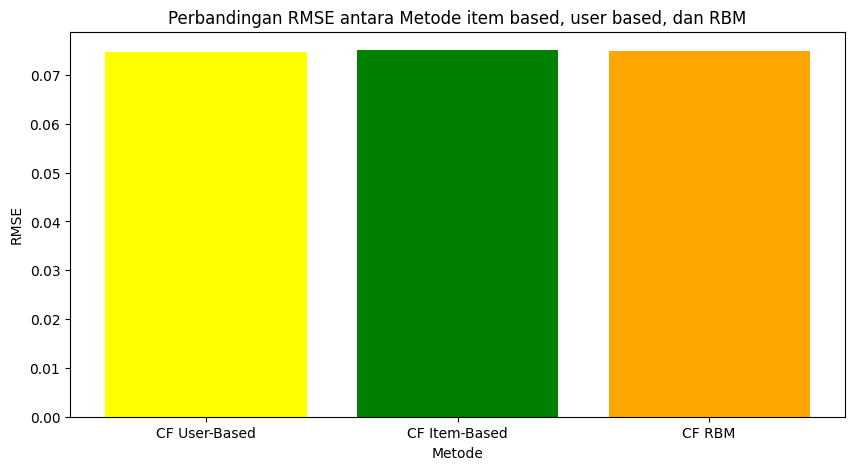

In [ ]:
# Data RMSE untuk setiap metode Collaborative Filtering
methods = ['CF User-Based', 'CF Item-Based', 'CF RBM']
rmse_values = [user_cf_rmse, item_cf_rmse, rmse_cf_rbm]

plt.figure(figsize=(10, 5))
plt.bar(methods, rmse_values, color=['yellow','green', 'orange'])
plt.xlabel('Metode')
plt.ylabel('RMSE')
plt.title('Perbandingan RMSE antara Metode item based, user based, dan RBM')
plt.show()

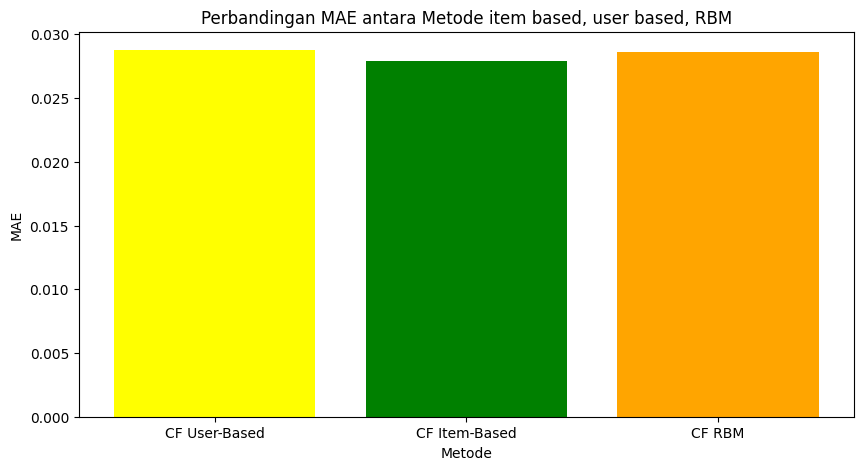

In [ ]:
# Data mae untuk setiap metode Collaborative Filtering
methods = ['CF User-Based', 'CF Item-Based', 'CF RBM']
mae_values = [user_cf_mae, item_cf_mae, MAE_CF]

plt.figure(figsize=(10, 5))
plt.bar(methods, mae_values, color=['yellow','green', 'orange'])
plt.xlabel('Metode')
plt.ylabel('MAE')
plt.title('Perbandingan MAE antara Metode item based, user based, RBM')
plt.show()

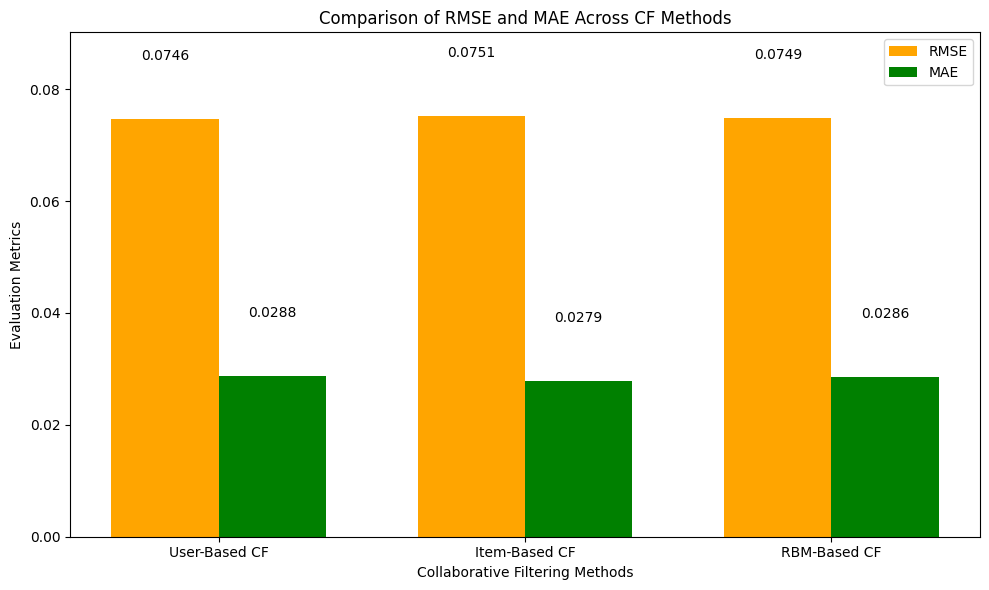

In [ ]:
methods = ['User-Based CF', 'Item-Based CF', 'RBM-Based CF']
rmse_values = [user_cf_rmse, item_cf_rmse, rmse_cf_rbm]
mae_values = [user_cf_mae, item_cf_mae, MAE_CF]

# Create positions for each group of bars
x = np.arange(len(methods))
width = 0.35

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rmse_values, width, label='RMSE', color='orange')
plt.bar(x + width/2, mae_values, width, label='MAE', color='green')

# Add labels and title in English
plt.xlabel('Collaborative Filtering Methods')
plt.ylabel('Evaluation Metrics')
plt.title('Comparison of RMSE and MAE Across CF Methods')
plt.xticks(x, methods)
plt.legend()

# Add value labels above each bar
for i in range(len(methods)):
    plt.text(x[i] - width/2, rmse_values[i] + 0.01, f'{rmse_values[i]:.4f}', ha='center', va='bottom')
    plt.text(x[i] + width/2, mae_values[i] + 0.01, f'{mae_values[i]:.4f}', ha='center', va='bottom')

plt.ylim(0, max(rmse_values + mae_values) * 1.2)
plt.tight_layout()
plt.show()

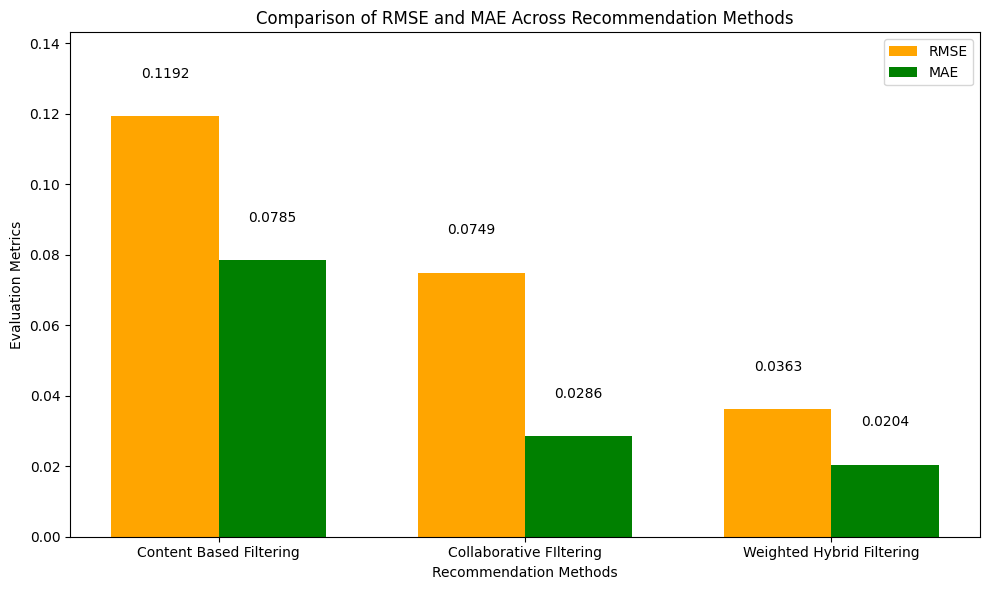

In [ ]:
methods = ['Content Based Filtering', 'Collaborative FIltering', 'Weighted Hybrid Filtering']
rmse_values = [rmse_cbf_tfidf, rmse_cf_rbm, rmse_whf_tfidf]
mae_values = [MAE_CBF, MAE_CF, MAE_WHF]

# Create positions for each group of bars
x = np.arange(len(methods))
width = 0.35

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(x - width/2, rmse_values, width, label='RMSE', color='orange')
plt.bar(x + width/2, mae_values, width, label='MAE', color='green')

# Add labels and title in English
plt.xlabel('Recommendation Methods')
plt.ylabel('Evaluation Metrics')
plt.title('Comparison of RMSE and MAE Across Recommendation Methods')
plt.xticks(x, methods)
plt.legend()

# Add value labels above each bar
for i in range(len(methods)):
    plt.text(x[i] - width/2, rmse_values[i] + 0.01, f'{rmse_values[i]:.4f}', ha='center', va='bottom')
    plt.text(x[i] + width/2, mae_values[i] + 0.01, f'{mae_values[i]:.4f}', ha='center', va='bottom')

plt.ylim(0, max(rmse_values + mae_values) * 1.2)
plt.tight_layout()
plt.show()

In [ ]:
new_actualcbf = df_normalized.copy()
new_predcbf = user_cf_evaluation_df.copy()

new_actual_values = new_actualcbf.drop(columns='nama film').to_numpy()
new_pred_values = new_predcbf.drop(columns='nama film').to_numpy()

new_y_actualcbf = new_actual_values.flatten()
new_y_predcbf = new_pred_values.flatten()

MAE_CBF = mean_absolute_error(new_y_actualcbf, new_y_predcbf)
MSE_CBF = mean_squared_error(new_y_actualcbf, new_y_predcbf)
rmse_cbf_tfidf = math.sqrt(MSE_CBF)

print("Mean Absolute Error (MAE):", MAE_CBF)
print("Root Mean Square Error (RMSE):", rmse_cbf_tfidf)

Mean Absolute Error (MAE): 0.028765342069180924
Root Mean Square Error (RMSE): 0.07462901358106011
